In [1]:
import numpy as np
import random as rd #includes last number for randint
from pylab import *

In [2]:
L = 50
dE = 1 

Lattice = np.zeros([L,L])

Time = 7000 #Number of repetitions for the loop
DimerCount = 0
Energy = np.zeros(Time)

t_array = np.linspace(0, Time - 1, Time)

T_0 = 10
Tau = 1000
T = T_0 * np.exp(-t_array/Tau)
 

for t in range(Time):
    Move = rd.randint(1, 4) #1 is right, 2 is down, 3 is left, 4 is up
    i = rd.randint(0, L-1)
    j = rd.randint(0, L-1)

    
    
    if Move == 1 and Lattice[i,j] == 0 and Lattice[i, (j+1)%L] == 0 and j != L-1:
        Lattice[i,j] = 5
        Lattice[i,(j+1)] = 6
        DimerCount += 1
        
    elif Move == 2 and Lattice[i,j] == 0 and Lattice[(i+1)%L, j] == 0 and i != L-1:
        Lattice[i,j] = 7
        Lattice[(i+1), j] = 8
        DimerCount += 1
        
    elif Move == 3 and Lattice[i,j] == 0 and Lattice[i, j-1] == 0 and j != 0:
        Lattice[i,j] = 6
        Lattice[i, j-1] = 5
        DimerCount += 1

    elif Move == 4 and Lattice[i,j] == 0 and Lattice[i-1, j] == 0 and i != 0:
        Lattice[i,j] = 8
        Lattice[i-1, j] = 7
        DimerCount += 1
        
        
    #Dimer removal/Markov Chain
        
    elif Move == 1 and Lattice[i,j] == 5:
        if rd.random() < np.exp(-dE/T[t]):
            Lattice[i,j] = 0
            Lattice[i,(j+1)] = 0
            DimerCount -= 1
    
    elif Move == 2 and Lattice[i,j] == 7:
        if rd.random() < np.exp(-dE/T[t]):
            Lattice[i,j] = 0
            Lattice[(i+1), j] = 0
            DimerCount -= 1
    
    elif Move == 3 and Lattice[i,j] == 6:
        if rd.random() < np.exp(-dE/T[t]):
            Lattice[i,j] = 0
            Lattice[i, j-1] = 0
            DimerCount -= 1
            
    elif Move == 4 and Lattice[i,j] == 8:
        if rd.random() < np.exp(-dE/T[t]):
            Lattice[i,j] = 0
            Lattice[i-1, j] = 0
            DimerCount -= 1
    
    
    Energy[t] = -DimerCount


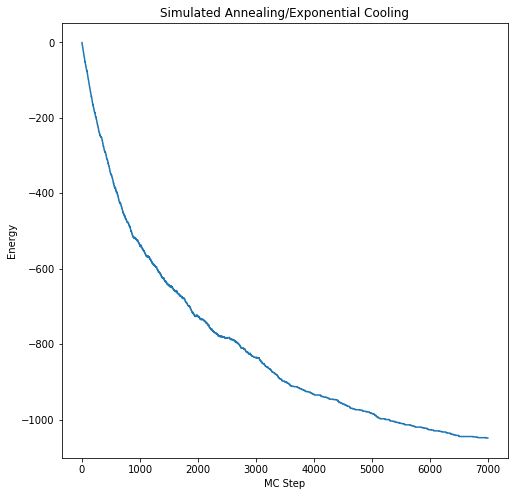

In [3]:
figure(figsize=(8,8))
xlabel('MC Step')
ylabel('Energy')
title('Simulated Annealing/Exponential Cooling')
plot(t_array, Energy)

402


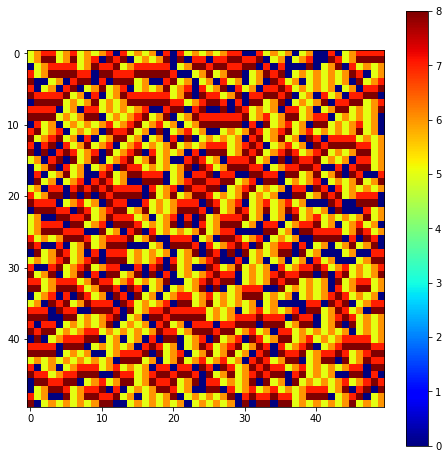

In [4]:
#Print of Final Covering

#Number of Imperfections/Zeros
Imp_Num = (L**2 - np.count_nonzero(Lattice))
print(Imp_Num)

#As shown below, the blue would be considered imperfections as they are areas where the Lattice is not being occupied 
#by a dimer so they are empty, for larger Tau's these imperfections are larger and more frequent in the material
#whereas for more MC steps/smaller Tau reduces the number of imperfections

figure(figsize=(8,8))
imshow(Lattice, cmap ='jet')
colorbar()

In [5]:
#np.set_printoptions(threshold=np.inf)
#print(Lattice)